<a href="https://colab.research.google.com/github/PrathmeshAdsod/ICR-Identifying-Age-Related-Conditions/blob/master/ICR_Identifying_Age_Related_Conditions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
## *Predict if a person has any of three medical conditions*

1.   1 - if person have any one of the medical condition
2.   0 - if person don't have any of the medical condition




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#!pip install pandas_profiling
#from pandas_profiling import ProfileReport

In [ ]:
!pip install sweetviz
import sweetviz as sv

In [ ]:
!pip install -q kaggle

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datasets Data Science/icr-identify-age-related-conditions/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datasets Data Science/icr-identify-age-related-conditions/test.csv')
greeks = pd.read_csv('/content/drive/MyDrive/Datasets Data Science/icr-identify-age-related-conditions/greeks.csv')

# New Section

In [ ]:
train.rename(columns = {"Class" : "target"}, inplace = True)
train.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,target
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [ ]:
greeks.head()

,Id,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,B,C,G,D,3/19/2019
1,007255e47698,A,C,M,B,Unknown
2,013f2bd269f5,A,C,M,B,Unknown
3,043ac50845d5,A,C,M,B,Unknown
4,044fb8a146ec,D,B,F,B,3/25/2020


In [ ]:
test.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
0,00eed32682bb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,010ebe33f668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,02fa521e1838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,040e15f562a2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,046e85c7cc7f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(train.columns)
print('The number of columns present in Train dataset are ', len(train.columns))

Index(['Id', 'AB', 'AF', 'AH', 'AM', 'AR', 'AX', 'AY', 'AZ', 'BC', 'BD ', 'BN',
       'BP', 'BQ', 'BR', 'BZ', 'CB', 'CC', 'CD ', 'CF', 'CH', 'CL', 'CR', 'CS',
       'CU', 'CW ', 'DA', 'DE', 'DF', 'DH', 'DI', 'DL', 'DN', 'DU', 'DV', 'DY',
       'EB', 'EE', 'EG', 'EH', 'EJ', 'EL', 'EP', 'EU', 'FC', 'FD ', 'FE', 'FI',
       'FL', 'FR', 'FS', 'GB', 'GE', 'GF', 'GH', 'GI', 'GL', 'target'],
      dtype='object')
The number of columns present in Train dataset are  58


 AB-GL Fifty-six **anonymized** health characteristics. All are numeric except for EJ, which is categorical.
So all these 56 columns are health characteristics

In [ ]:
train.columns.isnull()
#train.columns.isnull().sum()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

There is no null values in any column of train dataset

In [ ]:
print(train.nunique())

Id        617
AB        217
AF        599
AH        227
AM        605
AR        130
AX        427
AY        148
AZ        484
BC        259
BD        617
BN         53
BP        612
BQ        515
BR        566
BZ        115
CB        553
CC        602
CD        584
CF        586
CH        135
CL        123
CR        595
CS        576
CU        307
CW        426
DA        611
DE        616
DF        137
DH        191
DI        571
DL        604
DN        576
DU        253
DV         39
DY        590
EB        439
EE        513
EG        610
EH        127
EJ          2
EL        311
EP        275
EU        455
FC        600
FD        337
FE        615
FI        498
FL        388
FR        435
FS        161
GB        560
GE        264
GF        611
GH        596
GI        615
GL        355
target      2
dtype: int64


617 Unique rows are their

In [ ]:
train.duplicated().sum()

0

In [ ]:
#pandas_profiling is giving heavy report which is not handlable hby Colab
#profile = ProfileReport(train)
#profile.to_file('EDA_Report.html')

In [ ]:
#report = sv.analyze(train)
#report.show_html()
#file:///C:/Users/Ovi/Downloads/SWEETVIZ_REPORT.html  -- here my local report is downloaded

# Missing Values
**After Findings in EDA report. We came to know that in training data BQ, CB, CC, DU, EL, FC, FL, FS, GL columns have missing values**

In [ ]:
contains_missing = ['BQ','CB','CC','DU','EL','FC','FL','FS','GL']

for col in contains_missing :
   mean_value = train[col].mean()
   train[col].fillna(value=mean_value, inplace=True)  # Replace NaN values with the mean value

In [ ]:
correlated_data = train.corr()
print(correlated_data)

              AB        AF        AH        AM        AR        AX        AY  \
AB      1.000000  0.350231  0.249246  0.530687  0.157712  0.471912  0.011004   
AF      0.350231  1.000000  0.044140  0.183961  0.044917  0.248439  0.039417   
AH      0.249246  0.044140  1.000000  0.128268  0.749794  0.039324  0.055385   
AM      0.530687  0.183961  0.128268  1.000000  0.175212  0.225382  0.081666   
AR      0.157712  0.044917  0.749794  0.175212  1.000000  0.011715  0.099947   
AX      0.471912  0.248439  0.039324  0.225382  0.011715  1.000000  0.016315   
AY      0.011004  0.039417  0.055385  0.081666  0.099947  0.016315  1.000000   
AZ      0.158569  0.219172  0.095627  0.131885  0.099282  0.269728  0.036790   
BC      0.331736  0.058831  0.366910  0.329658  0.073730  0.079799  0.132495   
BD      0.278920  0.045430  0.209508  0.277908 -0.002509  0.124581  0.506917   
BN      0.246410  0.131428  0.055154  0.158404  0.048671  0.143351  0.042365   
BP      0.412869  0.241027  0.223916  0.

<ipython-input-16-e6aee56e0c91>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlated_data = train.corr()


<Axes: >

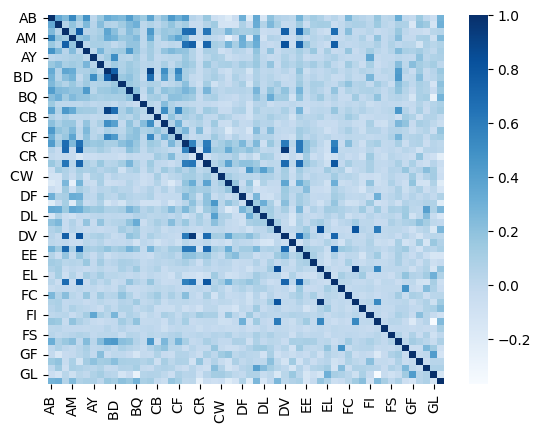

In [ ]:
sns.heatmap(data=correlated_data, cmap='Blues', annot=False)

From above heatmap we can infer that the variables are not much correlated with each other

***We dont need to remove outliers from here as our patients can have different symptampts which can be as low sevier, high sevier etc. ***
We should make our model to train on them as well. Because these are related to health and their can be major changes.

In [ ]:
# The merge() function in Python is used to combine two DataFrames based on a common column.
# The merge() function takes two DataFrames as input and merges them on the specified column.
merged_train = pd.merge(train, greeks, on='Id')

In [ ]:
merged_train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,GF,GH,GI,GL,target,Alpha,Beta,Gamma,Delta,Epsilon
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,2003.810319,22.136229,69.834944,0.120343,1,B,C,G,D,3/19/2019
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,27981.562750,29.135430,32.131996,21.978000,0,A,C,M,B,Unknown
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,13676.957810,28.022851,35.192676,0.196941,0,A,C,M,B,Unknown
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,2094.262452,39.948656,90.493248,0.155829,0,A,C,M,B,Unknown
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8524.370502,45.381316,36.262628,0.096614,1,D,B,F,B,3/25/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,8095.932828,24.640462,69.191944,21.978000,0,A,B,M,B,9/13/2020
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,3085.308063,29.648928,124.808872,0.145340,0,A,B,M,B,9/8/2020
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,6474.652866,26.166072,119.559420,21.978000,0,A,C,M,B,7/24/2019
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,1965.343176,25.116750,37.155112,0.184622,0,A,C,M,B,1/31/2019


In [ ]:
print(len(merged_train['Alpha'].unique()))
print(len(merged_train['Beta'].unique()))
print(len(merged_train['Gamma'].unique()))
print(len(merged_train['Delta'].unique()))
print(len(merged_train['EJ'].unique()))

4
3
8
4
2


**In our use case we I dont think I need Time when patient reported. Yes it can have its use case also if their is a Plague and Corona virus like situation. But this column contains lots of Unkown values so we are dropping it for now. We will take it under consideration later on in other iteration**

**In our use case One-Hot-Encoding will be better thaN Label Encoding.Label Encoding works better on ordinal category data. Ex- Low, Medium, High. So here it will be better to use One-Hot-Encoding because we have nominal data in all columns and not ordinal data. Here we have Small to Moderate Cardinality so we can go with One-Hot-Enodin otherwise if Cardinality is high then we could think about Frequency Encoding**

**Here Alpha, Beta, Gammma, Delta are categorical columns**

In [ ]:
one_hot_encoded = pd.get_dummies(merged_train[['EJ','Alpha', 'Beta', 'Gamma', 'Delta']])

print(one_hot_encoded.head())

   EJ_A  EJ_B  Alpha_A  Alpha_B  Alpha_D  Alpha_G  Beta_A  Beta_B  Beta_C  \
0     0     1        0        1        0        0       0       0       1   
1     1     0        1        0        0        0       0       0       1   
2     0     1        1        0        0        0       0       0       1   
3     0     1        1        0        0        0       0       0       1   
4     0     1        0        0        1        0       0       1       0   

   Gamma_A  ...  Gamma_E  Gamma_F  Gamma_G  Gamma_H  Gamma_M  Gamma_N  \
0        0  ...        0        0        1        0        0        0   
1        0  ...        0        0        0        0        1        0   
2        0  ...        0        0        0        0        1        0   
3        0  ...        0        0        0        0        1        0   
4        0  ...        0        1        0        0        0        0   

   Delta_A  Delta_B  Delta_C  Delta_D  
0        0        0        0        1  
1        0        

In [ ]:
one_hot_encoded.head()

,EJ_A,EJ_B,Alpha_A,Alpha_B,Alpha_D,Alpha_G,Beta_A,Beta_B,Beta_C,Gamma_A,...,Gamma_E,Gamma_F,Gamma_G,Gamma_H,Gamma_M,Gamma_N,Delta_A,Delta_B,Delta_C,Delta_D
0,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
3,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
len(one_hot_encoded.columns)

21

In [ ]:
merged_train.drop(['Alpha', 'Beta', 'Gamma', 'Delta','Epsilon', 'EJ'], axis=1, inplace=True)

In [ ]:
#preserve original data first
my_data = merged_train

In [ ]:
#new_set = pd.merge(left=merged_train, right=one_hot_encoded,how='left')
#newset = merged_train.append(one_hot_encoded)

ind = 0
for column in one_hot_encoded.columns:
   merged_train.insert(len(merged_train.columns), column , one_hot_encoded.loc[:, column])
   ind = ind+1


In [ ]:
merged_train

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,Gamma_E,Gamma_F,Gamma_G,Gamma_H,Gamma_M,Gamma_N,Delta_A,Delta_B,Delta_C,Delta_D
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,0,0,1,0,0,0,0,0,0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0,0,0,0,1,0,0,1,0,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,0,0,0,0,1,0,0,1,0,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,0,0,0,0,1,0,0,1,0,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0,0,0,0,1,0,0,1,0,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,0,0,0,0,1,0,0,1,0,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0,0,0,0,1,0,0,1,0,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,0,0,0,0,1,0,0,1,0,0


**Now the dataset is perfect**

# Training

In [ ]:
target_column = merged_train["target"]
merged_train.drop(["target", "Id"], inplace=True, axis=1) # Remove target column for training the data
target_column

0      1
1      0
2      0
3      0
4      1
      ..
612    0
613    0
614    0
615    0
616    0
Name: target, Length: 617, dtype: int64

**We have separate test dataset. But we have just 5 rows in test dataset. So we use train_test_split for now to get better understanding on data**

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss, confusion_matrix

In [ ]:
is_string = np.vectorize(lambda x: isinstance(x, str))
rows_with_strings = np.where(is_string(merged_train))[0]

print(rows_with_strings)

[]


**Our dataset have high variation in data. Ex. look at columns 'AB', 'AH', 'AF', 'AR' and others. So their are lots of descripency and randomness. So we must have to *Normalize* it**

In [ ]:
# Create a StandardScaler object.
scaler = StandardScaler()
# Fit and transform the data.
X_scaled = scaler.fit_transform(merged_train)
X_scaled

array([[-0.57215263, -0.17097548, -0.26166896, ..., -1.6829433 ,
        -0.3401946 ,  5.20052445],
       [-0.70910524, -1.09780089, -0.26166896, ...,  0.59419708,
        -0.3401946 , -0.1922883 ],
       [-0.01521202, -0.37716884, -0.26166896, ...,  0.59419708,
        -0.3401946 , -0.1922883 ],
       ...,
       [-0.10651376, -0.45374164,  0.0901401 , ...,  0.59419708,
        -0.3401946 , -0.1922883 ],
       [-0.24346637, -0.9739043 , -0.26166896, ...,  0.59419708,
        -0.3401946 , -0.1922883 ],
       [ 0.0121785 , -0.360885  ,  3.35098739, ...,  0.59419708,
        -0.3401946 , -0.1922883 ]])

In [ ]:
# merged_train ------- input feature
# target_column ------ output feature
"""
X_train ------ features that will be used to train the model.
X_test  ------ features that will be used to test the model.
y_train ------ labels that correspond to the features in X_train.
y_test  ------ labels that correspond to the features in X_test.
"""
X_train, X_test, y_train, y_test = train_test_split(merged_train, target_column, test_size=0.2, random_state = 60)

In [ ]:
print(len(X_train), ' ', len(X_test), len(y_train), ' ',len(y_test))

493   124 493   124


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [49]:
# Create the models.
rf_model = RandomForestClassifier()

xgboost_model = XGBClassifier()

svm_model = SVC()

logistic_regression_model = LogisticRegression()


LogisticRegression()


In [51]:
models = [rf_model, xgboost_model, svm_model, logistic_regression_model]

for model in models :

      # Fit the model to the training data
      model.fit(X_train, y_train)

      # Predict the training data
      y_train_pred = model.predict(X_train)

      # Predict the test data
      y_test_pred = model.predict(X_test)

      # Calculate the evaluation metrics on the training data
      train_accuracy = accuracy_score(y_train, y_train_pred)
      train_precision = precision_score(y_train, y_train_pred)
      train_recall = recall_score(y_train, y_train_pred)
      train_f1 = f1_score(y_train, y_train_pred)
      train_log_loss = log_loss(y_train, y_train_pred)

      # Calculate the evaluation metrics on the test data
      test_accuracy = accuracy_score(y_test, y_test_pred)
      test_precision = precision_score(y_test, y_test_pred)
      test_recall = recall_score(y_test, y_test_pred)
      test_f1 = f1_score(y_test, y_test_pred)
      test_log_loss = log_loss(y_test, y_test_pred)

      # Print the evaluation metrics
      print('Training accuracy:', train_accuracy)
      print('Training precision:', train_precision)
      print('Training recall:', train_recall)
      print('Training f1:', train_f1)
      print('Training log loss:', train_log_loss)
      print()
      print('Test accuracy:', test_accuracy)
      print('Test precision:', test_precision)
      print('Test recall:', test_recall)
      print('Test f1:', test_f1)
      print('Test log loss:', test_log_loss)

      # Print the confusion matrix for the test data
      print(confusion_matrix(y_test, y_test_pred))
      print('-------------------------------------------------------------')
      print('-------------------------------------------------------------')

Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Training f1: 1.0
Training log loss: 2.2204460492503136e-16

Test accuracy: 1.0
Test precision: 1.0
Test recall: 1.0
Test f1: 1.0
Test log loss: 2.2204460492503136e-16
[[103   0]
 [  0  21]]
-------------------------------------------------------------
-------------------------------------------------------------
Training accuracy: 1.0
Training precision: 1.0
Training recall: 1.0
Training f1: 1.0
Training log loss: 2.2204460492503136e-16

Test accuracy: 1.0
Test precision: 1.0
Test recall: 1.0
Test f1: 1.0
Test log loss: 2.2204460492503136e-16
[[103   0]
 [  0  21]]
-------------------------------------------------------------
-------------------------------------------------------------
Training accuracy: 0.8397565922920892
Training precision: 0.75
Training recall: 0.13793103448275862
Training f1: 0.23300970873786406
Training log loss: 5.775757845314919

Test accuracy: 0.8387096774193549
Test precision: 1.0
Test recall

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Result
**From above XGBoost and Random Forest are giving almost 100% accuracy, precision, recall, f1_score on both train and test data**